In [ ]:
!pip -q install ultralytics




   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 70.0 MB/s eta 0:00:00


In [ ]:
from google.colab import files
uploaded = files.upload()
print("Uploaded:", list(uploaded.keys()))



Saving Car Parking.v1i.yolov8.zip to Car Parking.v1i.yolov8.zip
Uploaded: ['Car Parking.v1i.yolov8.zip']


In [ ]:
!ls -lah
!unzip -o "*.zip" -d /content/datasets
!ls -lah /content/datasets
import glob, os

yaml_paths = glob.glob("/content/datasets/**/data.yaml", recursive=True)
print("Found data.yaml files:")
for p in yaml_paths:
    print(" -", p)

if not yaml_paths:
    raise FileNotFoundError(
        "No data.yaml found. You probably downloaded the wrong format.\n"
        "Go back to Roboflow → Versions → Download Dataset → choose YOLOv8 ZIP."
    )

DATA_YAML = yaml_paths[0]  # use the first one
print("\nUsing:", DATA_YAML)
print("\n--- data.yaml content ---")
with open(DATA_YAML, "r") as f:
    print(f.read())
print("-------------------------")


total 6.3M
drwxr-xr-x 1 root root 4.0K Dec 27 19:23  .
drwxr-xr-x 1 root root 4.0K Dec 27 19:19  ..
-rw-r--r-- 1 root root 6.3M Dec 27 19:23 'Car Parking.v1i.yolov8.zip'
drwxr-xr-x 4 root root 4.0K Dec  9 14:41  .config
drwxr-xr-x 1 root root 4.0K Dec  9 14:42  sample_data
Archive:  Car Parking.v1i.yolov8.zip
  inflating: /content/datasets/README.dataset.txt  
  inflating: /content/datasets/README.roboflow.txt  
  inflating: /content/datasets/data.yaml  
   creating: /content/datasets/test/
   creating: /content/datasets/test/images/
 extracting: /content/datasets/test/images/Untitled-104_jpg.rf.b2d669a552925a6bd3dbb1d1c3423031.jpg  
 extracting: /content/datasets/test/images/Untitled-107_jpg.rf.c3ddbda252e561876f4b5e63e618df05.jpg  
 extracting: /content/datasets/test/images/Untitled-10_jpg.rf.07736f5a32348d81fbe53829a618433b.jpg  
 extracting: /content/datasets/test/images/Untitled-111_jpg.rf.a9335c4a6d2e17a1c85f85f69d538b02.jpg  
 extracting: /content/datasets/test/images/Untitled-1

In [ ]:
from ultralytics import YOLO

model = YOLO("yolov8n.pt")  # fast/chose in roboflow

results = model.train(
    data=DATA_YAML,
    epochs=10,
    imgsz=640,
    batch=16
)

print("\nTraining done.")
print("Best weightin: runs/detect/train/weights/best.pt")


Ultralytics 8.3.241 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (NVIDIA L4, 22693MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/datasets/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=

In [ ]:
import glob

# Find all trained YOLO weight files
weight_files = glob.glob("runs/detect/**/weights/best.pt", recursive=True)

print("Found weight files:")
for w in weight_files:
    print(" -", w)

if not weight_files:
    raise FileNotFoundError("No YOLO weight files found. Training may not have completed.")

BEST_MODEL_PATH = weight_files[-1]  # use the most recent one
print("\nUsing:", BEST_MODEL_PATH)


Found weight files:
 - runs/detect/train2/weights/best.pt

Using: runs/detect/train2/weights/best.pt


In [ ]:
from ultralytics import YOLO

model = YOLO(BEST_MODEL_PATH)


Saving no parking.webp to no parking.webp
Testing: no parking.webp

image 1/1 /content/no parking.webp: 512x640 (no detections), 63.0ms
Speed: 3.0ms preprocess, 63.0ms inference, 0.7ms postprocess per image at shape (1, 3, 512, 640)


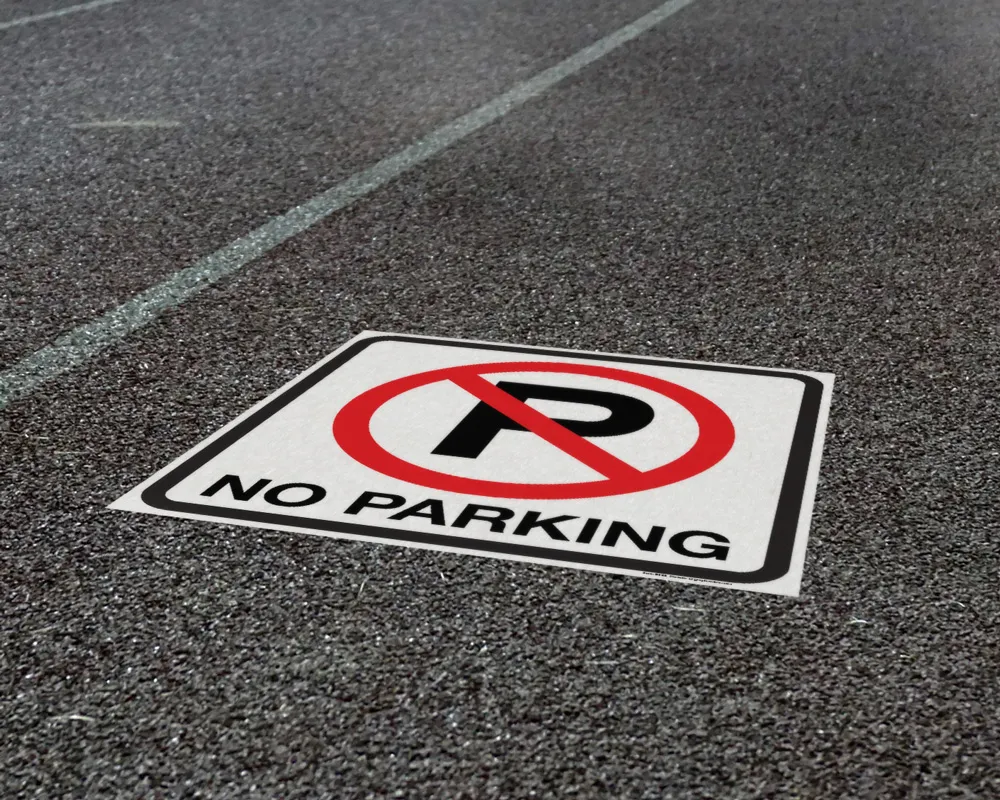

Detections: []
✅ No parking restriction detected or unclear


In [ ]:
from google.colab import files

# Upload a new image every time this cell is run
uploaded = files.upload()
image_path = list(uploaded.keys())[0]

print("Testing:", image_path)

# Run detection
r = model(image_path)[0]

# Show image with bounding boxes
r.show()

# ----- Priority logic -----
names = model.names
detected = []

for b in r.boxes:
    cls = int(b.cls[0])
    conf = float(b.conf[0])
    detected.append((names[cls], conf))

print("Detections:", detected)

access_classes = {
    "Disabled Parking",
    "Disabled Parking Symbol",
    "Disabled Parking Sign",
    "wheelchair_accessibility"
}

restriction_classes = {
    "cones",
    "curbsides",
    "No Parking Crosses",
    "No Parking Sign"
}

found_access = any(c in access_classes for c, _ in detected)
found_restrict = any(c in restriction_classes for c, _ in detected)

if found_access:
    print("♿ Disabled parking detected")
elif found_restrict:
    print("🚫 Parking restriction detected")
else:
    print("✅ No parking restriction detected or unclear")


In [ ]:
import glob

weight_files = glob.glob("runs/detect/**/weights/best.pt", recursive=True)

if not weight_files:
    raise FileNotFoundError("No trained YOLO model found.")

BEST_MODEL_PATH = weight_files[-1]
print("Using model:", BEST_MODEL_PATH)


Using model: runs/detect/train2/weights/best.pt


In [ ]:
from google.colab import files

files.download(BEST_MODEL_PATH)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>